### 用pytorch手动实现线性回归
1. 构造数据

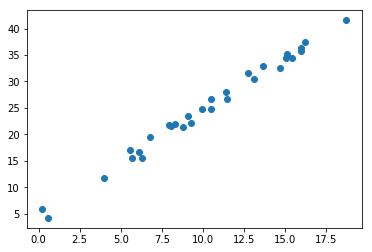

In [1]:
import torch as t
from matplotlib import pyplot as plt
%matplotlib inline
t.manual_seed(1)
size = 30
x = t.rand(size, 1) * 20
# 这里的噪声注意要是正态分布
y = x * 2 + (1 + t.rand(size,1)) * 3
plt.scatter(x, y)

### 拟合
$$y = kx + b$$

In [2]:
import torch as t
from matplotlib import pyplot as plt
%matplotlib inline
t.manual_seed(1000)
def get_x_y():
    size = 80
    x = t.rand(size, 1) * 20
    y = x * 2 + (1 + t.randn(size,1)) * 3
    return x, y

w = t.rand(1,1, requires_grad=True)
b = t.rand(1,1, requires_grad=True)
for _ in range(8000):
    x, y = get_x_y()
    y_pred = w * x + b

    # 无法收敛
    # loss = 0.5 * (y_pred - y) ** 2
    loss = t.mean((y_pred - y) ** 2)
    loss = loss.sum()
    loss.backward()
    
    # 检验求导是否正确
    # print(x.t().mm (y_pred - y))
    # print(w.grad)
    w.data.sub_(0.001 * w.grad.data)
    b.data.sub_(0.001 * b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
print(w, b)

tensor([[2.0056]], requires_grad=True) tensor([[2.9760]], requires_grad=True)


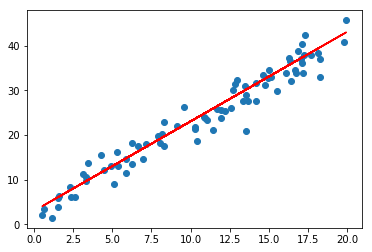

In [13]:
x, y = get_x_y()
plt.scatter(x,y)
y_prec = x * w + b
x = x.data.numpy()
y_prec = y_prec.data.numpy()
plt.plot(x, y_prec, color='red')